# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Load a dataset in Colab
uploaded = files.upload() # Upload csv file

Saving data_clustering.csv to data_clustering.csv


In [3]:
df = pd.read_csv('data_clustering.csv') # Load data

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Pilih fitur numerik sebagai input (X) dan hasil clustering sebagai label (y)
numeric_cols = [
    "Age", "Study_Hours_per_Week", "Online_Courses_Completed",
    "Assignment_Completion_Rate (%)", "Exam_Score (%)", "Attendance_Rate (%)",
    "Time_Spent_on_Social_Media (hours/week)", "Sleep_Hours_per_Night"
]

X = df[numeric_cols]  # Fitur
y = df["Cluster"]  # Label dari hasil clustering

# Bagi data menjadi 80% data latih dan 20% data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek ukuran dataset hasil splitting
print(f"Jumlah data latih: {X_train.shape[0]}")
print(f"Jumlah data uji: {X_test.shape[0]}")

Jumlah data latih: 8000
Jumlah data uji: 2000


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [5]:
# Inisialisasi model Decision Tree dan Random Forest
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model dengan data latih
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Setelah melakukan clustering pada dataset, langkah selanjutnya adalah membangun model klasifikasi untuk memprediksi cluster berdasarkan fitur yang tersedia. Pada tahap ini menggunakan dua algoritma klasifikasi yang berbeda:
- Decision Tree (DT)
- Random Forest (RF)

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Evaluasi Model Decision Tree:
  Akurasi: 0.94
  Presisi: 0.94
  Recall: 0.94
  F1-score: 0.94
------------------------------


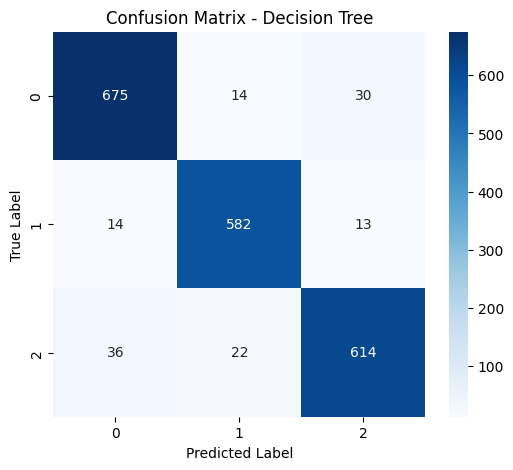

Evaluasi Model Random Forest:
  Akurasi: 0.96
  Presisi: 0.97
  Recall: 0.96
  F1-score: 0.96
------------------------------


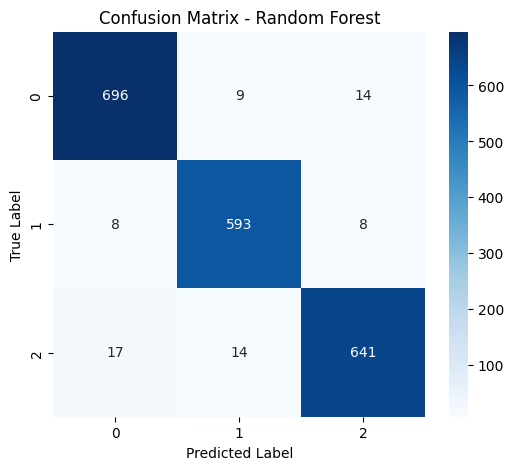

In [7]:
# Prediksi menggunakan model Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Prediksi menggunakan model Random Forest
y_pred_rf = rf_model.predict(X_test)

# Fungsi untuk menampilkan confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=set(y_true), yticklabels=set(y_true))
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Fungsi untuk mengevaluasi model dan menampilkan metrik
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Evaluasi Model {model_name}:")
    print(f"  Akurasi: {accuracy:.2f}")
    print(f"  Presisi: {precision:.2f}")
    print(f"  Recall: {recall:.2f}")
    print(f"  F1-score: {f1:.2f}")
    print("-" * 30)  # Garis pemisah


# Evaluasi model Decision Tree
evaluate_model(y_test, y_pred_dt, "Decision Tree")
plot_confusion_matrix(y_test, y_pred_dt, "Decision Tree")

# Evaluasi model Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")

**1. Evaluasi Decision Tree**
- Akurasi: 94%
- Precision: 94%
- Recall: 94%
- F1-score: 94%
- Confusion Matrix:

Model Decision Tree menunjukkan performa yang cukup baik dengan tingkat kesalahan yang rendah. Kesalahan terbesar terjadi pada cluster 2, di mana terdapat 36 sampel yang diklasifikasikan sebagai cluster 0 dan 22 sampel yang diklasifikasikan sebagai cluster 1. Meskipun demikian, model ini cukup handal dalam mengidentifikasi pola dalam data.


**2. Evaluasi Random Forest**
- Akurasi: 96%
- Precision: 97%
- Recall: 96%
- F1-score: 96%
- Confusion Matrix:

Model Random Forest menunjukkan performa yang lebih baik dibandingkan Decision Tree dengan akurasi yang lebih tinggi. Kesalahan klasifikasi lebih sedikit, terutama dalam memprediksi cluster 2, di mana hanya terdapat 17 sampel yang diklasifikasikan sebagai cluster 0 dan 14 sampel sebagai cluster 1. Model ini lebih stabil dan lebih kuat dalam menangani variasi dalam data dibandingkan Decision Tree.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [ ]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

**Analisis Precision dan Recall untuk Setiap Kelas
Berdasarkan confusion matrix:**

Decision Tree:

- Kesalahan terbesar terjadi pada cluster 2, di mana terdapat 36 sampel yang salah diklasifikasikan sebagai c;uster 0 dan 22 sampel yang diklasifikasikan sebagai cluster 1.
- Cluster 0 memiliki kesalahan kecil, dengan 14 sampel salah diklasifikasikan sebagai cluster 1 dan 30 sampel ke cluster 2.
- Cluster 1 juga mengalami sedikit kesalahan, dengan 14 sampel diklasifikasikan sebagai cluster 0 dan 13 sampel sebagai cluster 2.
- Precision dan recall cukup tinggi untuk setiap cluster, meskipun terdapat beberapa kesalahan klasifikasi. Model cukup baik dalam mengenali pola dalam data.

Random Forest:

- Kesalahan terbesar terjadi pada cluster 2, dengan 17 sampel yang diklasifikasikan sebagai cluster 0 dan 14 sampel diklasifikasikan sebagai cluster 1.
- Cluster 1 memiliki lebih sedikit kesalahan dibanding Decision Tree, dengan hanya 8 sampel diklasifikasikan sebagai cluster 0 dan 8 sampel diklasifikasikan sebagai cluster 2.
- Cluster 0 memiliki kesalahan yang lebih kecil dibanding Decision Tree, dengan hanya 9 sampel salah diklasifikasikan sebagai cluster 1 dan 14 sampel diklasifikasikan sebagai cluster 2.
- Secara keseluruhan, precision dan recall tetap tinggi (~96%), meskipun lebih rendah dibandingkan Decision Tree.

**Apakah Model Mengalami Overfitting atau Underfitting?**

Decision Tree:
- Akurasi yang tinggi (94%) menunjukkan model cukup baik dalam menangkap pola dari data latih.
- Kesalahan klasifikasi pada cluster tertentu menunjukkan bahwa model masih bisa diperbaiki dengan pruning atau hyperparameter tuning.
- Ada kemungkinan overfitting, terutama jika model memiliki kedalaman yang terlalu besar dan kurang generalisasi ke data baru.

Random Forest:
- Akurasi lebih tinggi dibandingkan Decision Tree (96%), menunjukkan model lebih generalizable.
- Lebih robust terhadap overfitting, tetapi masih bisa ditingkatkan dengan tuning lebih lanjut.


**Rekomendasi:**
- Menambah data untuk membantu model mengenali pola yang lebih baik
- Melalukan tuning
- Coba explore menggunakan algoritma lain